In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
DataPokemon = pd.read_csv('Pokemon.csv')
DataPokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
DataPokemon = DataPokemon.drop(DataPokemon.columns[0], axis=1)
DataPokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
DataPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
DataPokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


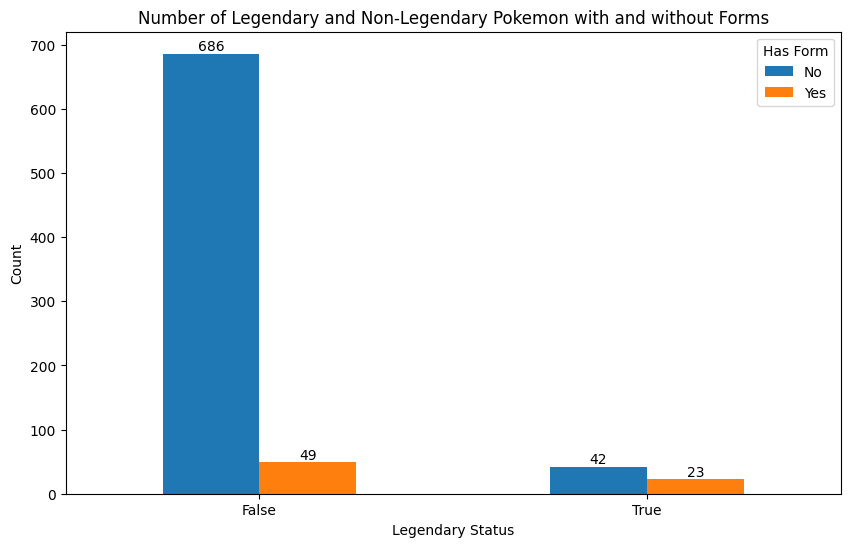

Number of Non-Legendary Pokemon without Forms: 686
Number of Non-Legendary Pokemon with Forms: 49
Number of Legendary Pokemon without Forms: 42
Number of Legendary Pokemon with Forms: 23


In [ ]:
# Create a new column to indicate if a Pokemon has a form
DataPokemon['Has_Form'] = DataPokemon['Name'].str.contains('Mega|Primal|Forme', regex=True)

# Group the data by Legendary status and the new Has_Form column
grouped_data = DataPokemon.groupby(['Legendary', 'Has_Form'])['Name'].count().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Legendary and Non-Legendary Pokemon with and without Forms')
plt.xlabel('Legendary Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Has Form', labels=['No', 'Yes'])

# Add count labels above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# Print the counts
print("Number of Non-Legendary Pokemon without Forms:", grouped_data.loc[False, False])
print("Number of Non-Legendary Pokemon with Forms:", grouped_data.loc[False, True])
print("Number of Legendary Pokemon without Forms:", grouped_data.loc[True, False])
print("Number of Legendary Pokemon with Forms:", grouped_data.loc[True, True])


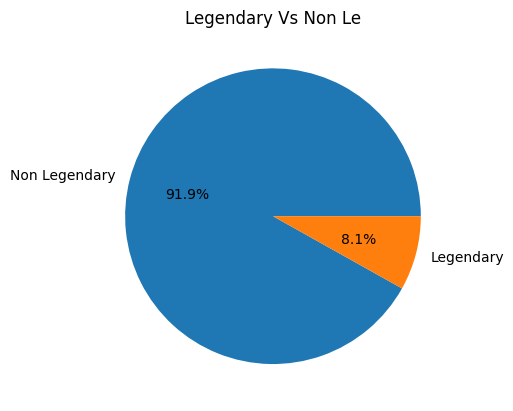

Legendary
False    735
True      65
Name: count, dtype: int64


In [ ]:
# Calculate the number of legendary and non-legendary Pokemon
legendary_count = DataPokemon['Legendary'].value_counts()

# Create a pie chart
plt.pie(legendary_count, labels=['Non Legendary', 'Legendary'], autopct='%1.1f%%')
plt.title('Legendary Vs Non Legendary Pokemon')
plt.show()

print(legendary_count)

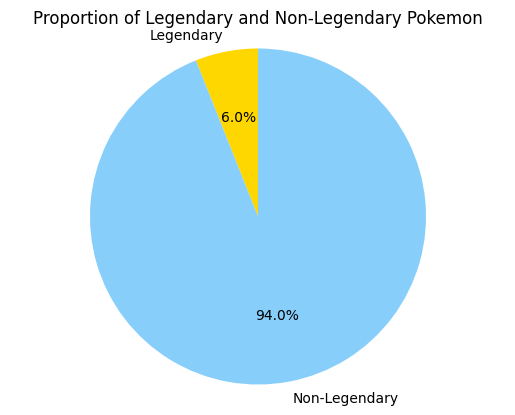

Number of Legendary Pokemon: 44
Number of Non-Legendary Pokemon: 686


In [ ]:
# Filter out Pokemon with "Forme" or "Mega" in their names
DataPokemonFiltered = DataPokemon[~DataPokemon['Name'].str.contains("Forme") & ~DataPokemon['Name'].str.contains("Mega")]

# Count legendary and non-legendary Pokemon
legendary_count = DataPokemonFiltered[DataPokemonFiltered['Legendary'] == True].shape[0]
non_legendary_count = DataPokemonFiltered[DataPokemonFiltered['Legendary'] == False].shape[0]

# Create a pie chart
labels = ['Legendary', 'Non-Legendary']
sizes = [legendary_count, non_legendary_count]
colors = ['gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Legendary and Non-Legendary Pokemon')
plt.show()

print("Number of Legendary Pokemon:", legendary_count)
print("Number of Non-Legendary Pokemon:", non_legendary_count)


In [ ]:
Legendary = DataPokemon[DataPokemon['Legendary'] == True]
Legendary

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
print('Min: ', Legendary['Total'].min())
print('Mean: ', Legendary['Total'].mean())
print('Max: ', Legendary['Total'].max())


Min:  580
Mean:  637.3846153846154
Max:  780


In [ ]:
#Legendary Pokemon with the lowest total stats
lowest_total_legendary = Legendary[Legendary['Total'] == Legendary['Total'].min()]
print("Legendary Pokemon with the Lowest Total Stats:\n", lowest_total_legendary)

#Legendary Pokemon with the highest total stats
highest_total_legendary = Legendary[Legendary['Total'] == Legendary['Total'].max()]
print("\nLegendary Pokemon with the Highest Total Stats:\n", highest_total_legendary)


Pokemon Legendaris dengan Total Nilai Terendah:
                          Name    Type 1    Type 2  Total   HP  Attack  \
156                  Articuno       Ice    Flying    580   90      85   
157                    Zapdos  Electric    Flying    580   90      90   
158                   Moltres      Fire    Flying    580   90     100   
262                    Raikou  Electric       NaN    580   90      85   
263                     Entei      Fire       NaN    580  115     115   
264                   Suicune     Water       NaN    580  100      75   
414                  Regirock      Rock       NaN    580   80     100   
415                    Regice       Ice       NaN    580   80      50   
416                 Registeel     Steel       NaN    580   80      75   
537                      Uxie   Psychic       NaN    580   75      75   
538                   Mesprit   Psychic       NaN    580   80     105   
539                     Azelf   Psychic       NaN    580   75     125   
69

In [ ]:
#Dsiplay all data in Legendary where the Total value is 580
Legendary[Legendary['Total'] == 580]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
262,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
414,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
416,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True
537,Uxie,Psychic,NaN,580,75,75,130,75,130,95,4,True


In [1]:
#Display all data in Legendary where the Total value is 780
Legendary[Legendary['Total'] == 780]

NameError: name 'Legendary' is not defined

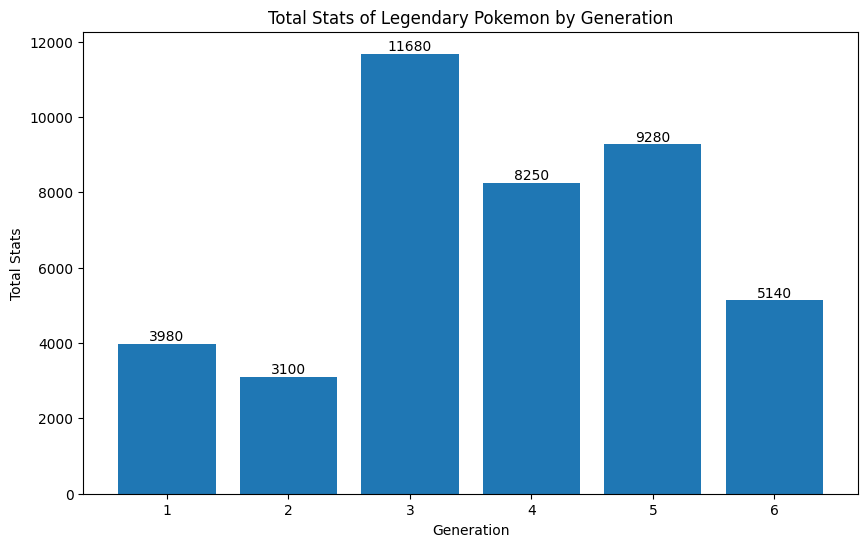

In [ ]:
#Group Legendary Pokemon by Generation and calculate the total stats for each generation
legendary_totals_by_generation = Legendary.groupby('Generation')['Total'].sum()

#Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(legendary_totals_by_generation.index, legendary_totals_by_generation.values)
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.title('Total Stats of Legendary Pokemon by Generation')

#Add labels with specific total values on top of each bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 2), ha='center', va='bottom')

plt.show()

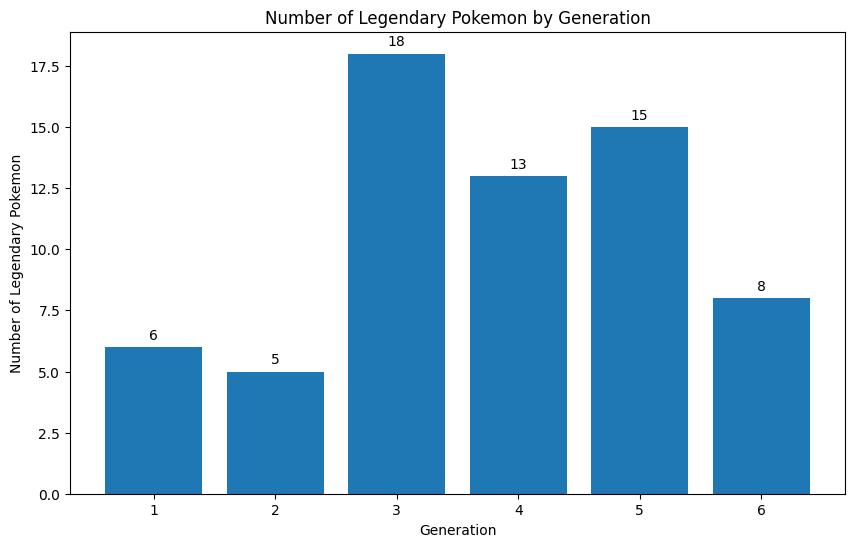

In [ ]:
#Count the number of Legendary Pokemon in each generation
legendary_counts_by_generation = Legendary.groupby('Generation')['Name'].count()

#Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(legendary_counts_by_generation.index, legendary_counts_by_generation.values)
plt.xlabel('Generation')
plt.ylabel('Number of Legendary Pokemon')
plt.title('Number of Legendary Pokemon by Generation')

#Add labels with specific counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.show()

In [ ]:
# Filter Pokemon with Total between 580 and 780, and Legendary False
filtered_pokemon = DataPokemon[(DataPokemon['Total'] >= 580) & (DataPokemon['Total'] <= 780) & (DataPokemon['Legendary'] == False)]
filtered_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
71,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
87,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
102,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
124,KangaskhanMega Kangaskhan,Normal,NaN,590,105,125,100,60,100,100,1,False
137,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


In [ ]:
#Group Pokemon by Generation and find the Pokemon with the highest Total in each generation
highest_total_pokemon_by_generation = DataPokemon.groupby('Generation').apply(lambda x: x.loc[x['Total'].idxmax()])

#Reset index to make 'Generation' a regular column again
highest_total_pokemon_by_generation = highest_total_pokemon_by_generation.reset_index(drop=True)

#Print the result
print(highest_total_pokemon_by_generation[['Name', 'Generation', 'Total']])


                      Name  Generation  Total
0      MewtwoMega Mewtwo X           1    780
1  TyranitarMega Tyranitar           2    700
2    RayquazaMega Rayquaza           3    780
3                   Arceus           4    720
4       KyuremBlack Kyurem           5    700
5      DiancieMega Diancie           6    700


In [ ]:
#Pokemon with the highest HP
highest_hp_pokemon = DataPokemon[DataPokemon['HP'] == DataPokemon['HP'].max()]
print("Pokemon with the highest HP:")
print(highest_hp_pokemon[['Name', 'HP']])

#Pokemon with the lowest HP
lowest_hp_pokemon = DataPokemon[DataPokemon['HP'] == DataPokemon['HP'].min()]
print("\nPokemon with the lowest HP:")
print(lowest_hp_pokemon[['Name', 'HP']])

Pokemon dengan HP tertinggi:
        Name   HP
261  Blissey  255

Pokemon dengan HP terendah:
         Name  HP
316  Shedinja   1


In [ ]:
# Pokemon with the highest Attack
highest_attack_pokemon = DataPokemon[DataPokemon['Attack'] == DataPokemon['Attack'].max()]
print("Pokemon with the highest Attack:")
print(highest_attack_pokemon[['Name', 'Attack']])

# Pokemon with the lowest Attack
lowest_attack_pokemon = DataPokemon[DataPokemon['Attack'] == DataPokemon['Attack'].min()]
print("\nPokemon with the lowest Attack:")
print(lowest_attack_pokemon[['Name', 'Attack']])

Pokemon dengan Attack tertinggi:
                    Name  Attack
163  MewtwoMega Mewtwo X     190

Pokemon dengan Attack terendah:
        Name  Attack
121  Chansey       5
488  Happiny       5


In [ ]:
#Pokemon with the highest Defense
highest_defense_pokemon = DataPokemon[DataPokemon['Defense'] == DataPokemon['Defense'].max()]
print("Pokemon with the highest Defense:")
print(highest_defense_pokemon[['Name', 'Defense']])

#Pokemon with the lowest Defense
lowest_defense_pokemon = DataPokemon[DataPokemon['Defense'] == DataPokemon['Defense'].min()]
print("\nPokemon with the lowest Defense:")
print(lowest_defense_pokemon[['Name', 'Defense']])

Pokemon dengan Defense tertinggi:
                    Name  Defense
224  SteelixMega Steelix      230
230              Shuckle      230
333    AggronMega Aggron      230

Pokemon dengan Defense terendah:
        Name  Defense
121  Chansey        5
488  Happiny        5


In [ ]:
#Pokemon with the highest Sp. Atk
highest_spatk_pokemon = DataPokemon[DataPokemon['Sp. Atk'] == DataPokemon['Sp. Atk'].max()]
print("Pokemon with the highest Sp. Atk:")
print(highest_spatk_pokemon[['Name', 'Sp. Atk']])

#Pokemon with the lowest Sp. Atk
lowest_spatk_pokemon = DataPokemon[DataPokemon['Sp. Atk'] == DataPokemon['Sp. Atk'].min()]
print("\nPokemon with the lowest Sp. Atk:")
print(lowest_spatk_pokemon[['Name', 'Sp. Atk']])

Pokemon dengan Sp. Atk tertinggi:
                    Name  Sp. Atk
164  MewtwoMega Mewtwo Y      194

Pokemon dengan Sp. Atk terendah:
        Name  Sp. Atk
230  Shuckle       10
381   Feebas       10
486   Bonsly       10


In [ ]:
#Pokemon with the highest Sp. Def
highest_spdef_pokemon = DataPokemon[DataPokemon['Sp. Def'] == DataPokemon['Sp. Def'].max()]
print("Pokemon with the highest Sp. Def:")
print(highest_spdef_pokemon[['Name', 'Sp. Def']])

#Pokemon with the lowest Sp. Def
lowest_spdef_pokemon = DataPokemon[DataPokemon['Sp. Def'] == DataPokemon['Sp. Def'].min()]
print("\nPokemon with the lowest Sp. Def:")
print(lowest_spdef_pokemon[['Name', 'Sp. Def']])

Pokemon dengan Sp. Def tertinggi:
        Name  Sp. Def
230  Shuckle      230

Pokemon dengan Sp. Def terendah:
                   Name  Sp. Def
13             Caterpie       20
16               Weedle       20
139            Magikarp       20
188           Igglybuff       20
347            Carvanha       20
429  DeoxysAttack Forme       20


In [ ]:
#Pokemon with the highest Speed
highest_speed_pokemon = DataPokemon[DataPokemon['Speed'] == DataPokemon['Speed'].max()]
print("Pokemon with the highest Speed:")
print(highest_speed_pokemon[['Name', 'Speed']])

#Pokemon with the lowest Speed
lowest_speed_pokemon = DataPokemon[DataPokemon['Speed'] == DataPokemon['Speed'].min()]
print("\nPokemon with the lowest Speed:")
print(lowest_speed_pokemon[['Name', 'Speed']])

Pokemon dengan Speed tertinggi:
                  Name  Speed
431  DeoxysSpeed Forme    180

Pokemon dengan Speed terendah:
         Name  Speed
230   Shuckle      5
495  Munchlax      5


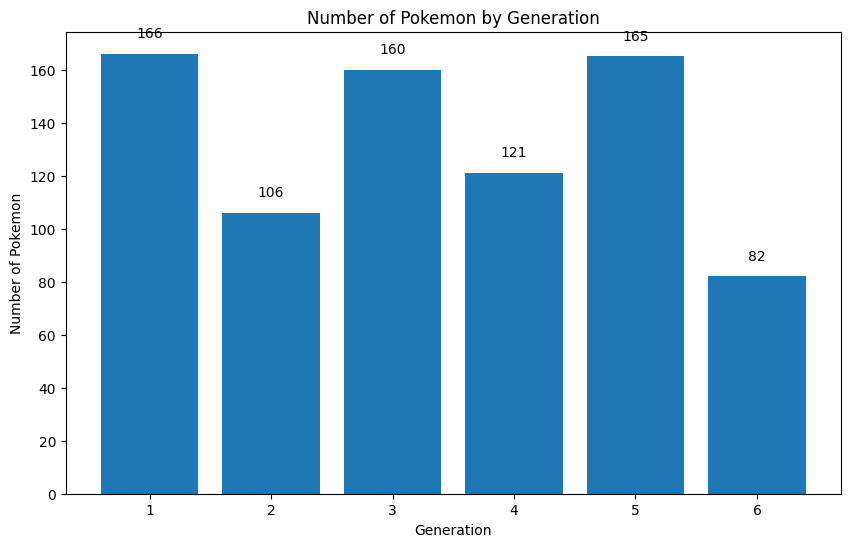

In [ ]:
#Count the number of Pokemon in each generation
pokemon_counts_by_generation = DataPokemon.groupby('Generation')['Name'].count()

#Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(pokemon_counts_by_generation.index, pokemon_counts_by_generation.values)
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
plt.title('Number of Pokemon by Generation')

#Add labels with specific counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.show()

In [ ]:
# Count the number of Legendary Pokemon
num_legendary = DataPokemon[DataPokemon['Legendary'] == True]['Name'].count()
print("Number of Legendary Pokemon:", num_legendary)

# Count the number of Non-Legendary Pokemon
num_non_legendary = DataPokemon[DataPokemon['Legendary'] == False]['Name'].count()
print("Number of Non-Legendary Pokemon:", num_non_legendary)

Jumlah Pokemon Legendaris: 65
Jumlah Pokemon non-Legendaris: 735


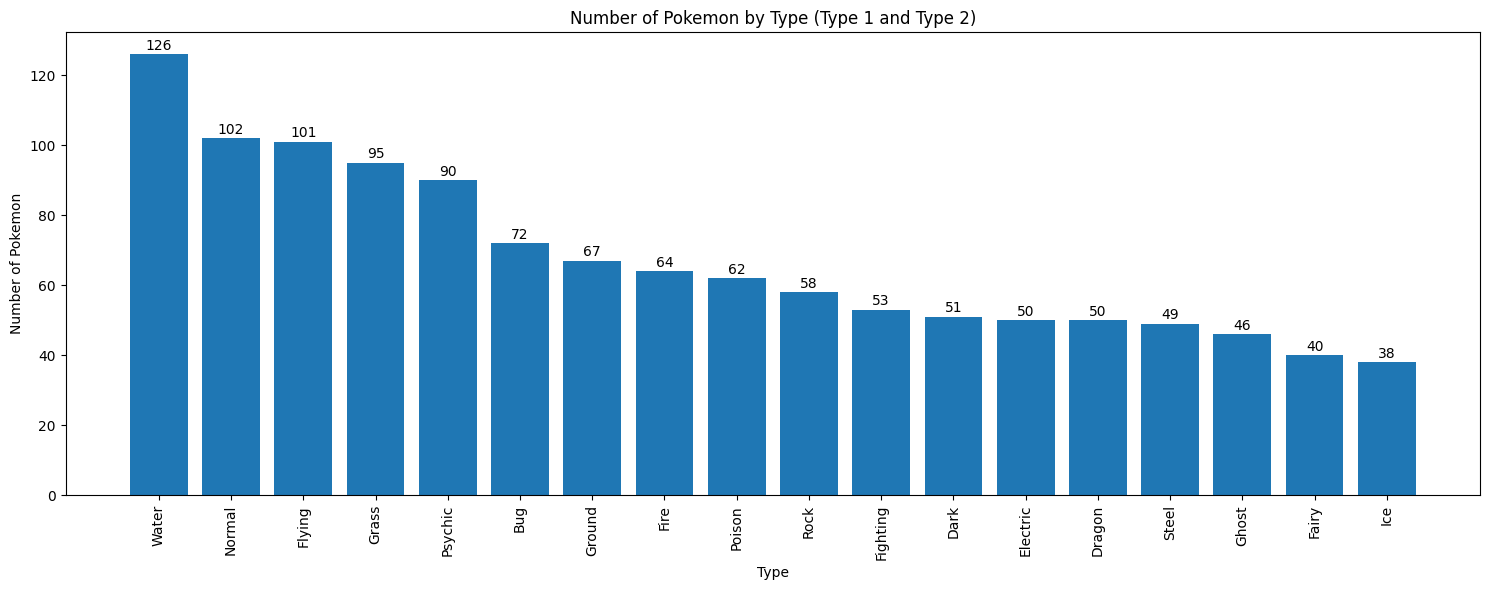

In [ ]:
#Count the number of Pokemon by Type 1
type1_counts = DataPokemon['Type 1'].value_counts()

#Count the number of Pokemon by Type 2
type2_counts = DataPokemon['Type 2'].value_counts()

#Combine both Type
all_type_counts = type1_counts.add(type2_counts, fill_value=0)

#Sort by the number of Pokemon in descending order
all_type_counts_sorted = all_type_counts.sort_values(ascending=False)

#Create a bar chart
plt.figure(figsize=(15, 6))
bars = plt.bar(all_type_counts_sorted.index, all_type_counts_sorted.values)
plt.xlabel('Type')
plt.ylabel('Number of Pokemon')
plt.title('Number of Pokemon by Type (Type 1 and Type 2)')
plt.xticks(rotation=90)

#Add labels with specific numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

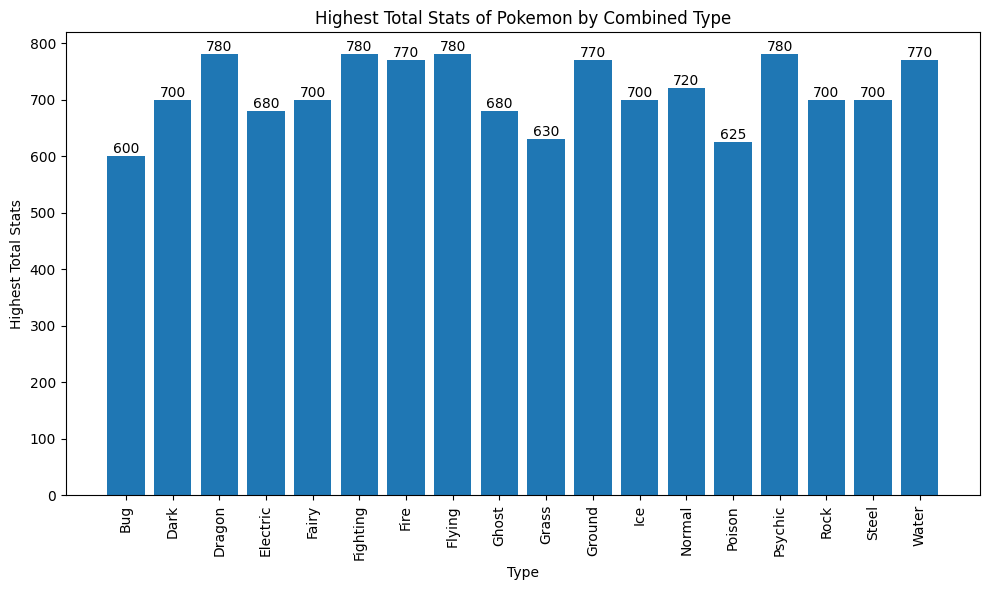

Bug, PinsirMega Pinsir (600)
Dark, TyranitarMega Tyranitar (700)
Dragon, RayquazaMega Rayquaza (780)
Electric, Zekrom (680)
Fairy, DiancieMega Diancie (700)
Fighting, MewtwoMega Mewtwo X (780)
Fire, GroudonPrimal Groudon (770)
Flying, RayquazaMega Rayquaza (780)
Ghost, GiratinaAltered Forme (680)
Grass, SceptileMega Sceptile (630)
Ground, GroudonPrimal Groudon (770)
Ice, KyuremBlack Kyurem (700)
Normal, Arceus (720)
Poison, VenusaurMega Venusaur (625)
Psychic, MewtwoMega Mewtwo X (780)
Rock, TyranitarMega Tyranitar (700)
Steel, MetagrossMega Metagross (700)
Water, KyogrePrimal Kyogre (770)


In [ ]:
#Combine Type 1 and Type 2 into one column 'Type Combined'
combined_types = DataPokemon.melt(id_vars=['Name', 'Total'], value_vars=['Type 1', 'Type 2'],
                                  var_name='Type Category', value_name='Type Combined').dropna()

#Find Pokemon with the highest Total in each combined type
highest_total_pokemon_by_combined_type = combined_types.groupby('Type Combined').apply(lambda x: x.loc[x['Total'].idxmax()])

#Reset index to make 'Type Combined' a regular column again
highest_total_pokemon_by_combined_type = highest_total_pokemon_by_combined_type.reset_index(drop=True)

#Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bars = plt.bar(highest_total_pokemon_by_combined_type['Type Combined'], highest_total_pokemon_by_combined_type['Total'])
plt.xlabel('Type')
plt.ylabel('Highest Total Stats')
plt.title('Highest Total Stats of Pokemon by Combined Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap

#Add labels with specific totals on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')  # Add text on top of bar

plt.show()

#Print the name of the Pokemon with the highest total stats for each combined type
for index, row in highest_total_pokemon_by_combined_type.iterrows():
    print(f"{row['Type Combined']}, {row['Name']} ({row['Total']})")